In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
orders         = pd.read_csv('instacart_orders.csv', sep=';')
products       = pd.read_csv('products.csv', sep=';')
departments    = pd.read_csv('departments.csv', sep=';')
aisles         = pd.read_csv('aisles.csv', sep=';')
order_products = pd.read_csv('order_products.csv', sep=';')

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
# Check for duplicated orders
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [9]:
# Check for all orders placed Wednesday at 2:00 AM
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [10]:
# Remove duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Double check for duplicate rows
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [12]:
# Double check for duplicate order IDs only
orders[orders.duplicated(subset='order_id')]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


It looks like there was a Wednesday where all the 2:00 AM orders were duplicated. We removed the duplicate orders from the dataset. Note that there are missing values in the `'days_since_prior_order'` column. We'll come back to those after addressing duplicates in the other tables.

### `products` data frame

In [13]:
# Check for fully duplicate rows
products[products.duplicated()]

,product_id,product_name,aisle_id,department_id


In [14]:
# Check for just duplicate product IDs
products[products.duplicated(subset='product_id')]

,product_id,product_name,aisle_id,department_id


In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products[products['product_name'].str.lower().duplicated()]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Check for duplicate product names that aren't missing
products[~(products['product_name'].isna()) & (products['product_name'].str.lower().duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


It looks like there are a lot of products in the dataset that have the same name, but different product IDs. These are probably distinct products, so we won't treat them as duplicates. Therefore, the `products` table doesn't contain duplicate values.

### `departments` data frame

In [17]:
departments[departments.duplicated()]

,department_id,department


In [18]:
departments[departments.duplicated(subset='department_id')]

,department_id,department


There are no duplicate values in the `departments` table.

### `aisles` data frame

In [19]:
aisles[aisles.duplicated()]

,aisle_id,aisle


In [20]:
aisles[aisles.duplicated(subset='aisle_id')]

,aisle_id,aisle


There are no duplicate values in the `aisles` table.

### `order_products` data frame

In [21]:
# Check for fullly duplicate rows
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [22]:
# Double check for any other tricky duplicates
order_products[order_products.duplicated(subset=['order_id', 'product_id'])]

,order_id,product_id,add_to_cart_order,reordered


There are no duplicate values in the `order_products` table.

## Find and remove missing values
From our work dealing with duplicate values, we noticed that we also have missing values to investigate:
* The `'product_name'` column of the `products` table
* The `'days_since_prior_order'` column of the `orders` table
* The `'add_to_cart_order'` column of the `order_products` table

### `products` data frame

In [23]:
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [24]:
# Are all of the missing product names associated with aisle ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


In [25]:
# Are all of the missing product names associated with department ID 21?
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


In [26]:
# What is this ailse and department?
print(departments[departments['department_id'] == 21]['department'])
print()
print(aisles[aisles['aisle_id'] == 100]['aisle'])

20    missing
Name: department, dtype: object

99    missing
Name: aisle, dtype: object


In [27]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


All of the missing product names have a `'missing'` label for their corresponding departments and aisles. Given the data we have, there is no way for us to determine what these products are called. Therefore, we decided to replace the missing values with the string `'Unknown'`.

### `orders` data frame

In [28]:
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [29]:
# Are there any missing values where it's not a customer's first order?
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


All of the missing `'days_since_prior_order'` values correspond to a customer's first ever order. This makes sense because there is no prior order! We'll leave the values as `NaN` so the column can remain numeric. Also, the `NaN` values shouldn't interfere with any calculations we might do using this column.

### `order_products` data frame

In [30]:
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [31]:
# What are the min and max values in this column?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


In [32]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
miss_cart_order_ids = sorted(list(order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()))

In [33]:
# Do all orders with missing values have more than 64 products?
order_products[order_products['order_id'].isin(miss_cart_order_ids)].groupby('order_id').size().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Length: 70, dtype: int64

In [34]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


For some reason, any item placed in the cart 65th or later has a missing value in the `'add_to_cart_order'` column. Maybe the data type of that column in the database could only hold integer values from 1 to 64. We've decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64. We also converted the column to integer data type. We just need to be careful to remember this if we perform calculations using this column during our analysis.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [35]:
sorted(orders['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [36]:
sorted(orders['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]

### [A2] What time of day do people shop for groceries?

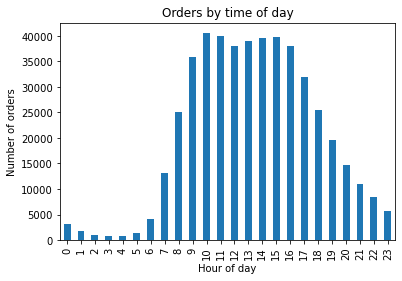

In [37]:
hour_of_day_counts = orders['order_hour_of_day'].value_counts().sort_index()
hour_of_day_counts.plot(kind='bar',
                        title='Orders by time of day',
                        xlabel='Hour of day',
                        ylabel='Number of orders'
                       )
plt.show()

Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM and 3:00 PM

### [A3] What day of the week do people shop for groceries?

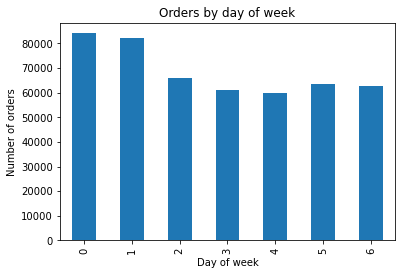

In [38]:
day_of_week_counts = orders['order_dow'].value_counts().sort_index()
day_of_week_counts.plot(kind='bar',
                        title='Orders by day of week',
                        xlabel='Day of week',
                        ylabel='Number of orders'
                       )
plt.show()

The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

### [A4] How long do people wait until placing another order?

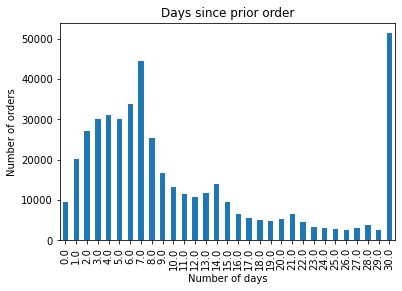

In [39]:
orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar',
                                                                  title='Days since prior order',
                                                                  xlabel='Number of days',
                                                                  ylabel='Number of orders'
                                                                 )
plt.show()

The 0 values probably correspond to customers who placed more than one order on the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interestingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [40]:
wed_mask = orders['order_dow'] == 3
hod_counts_wed = orders[wed_mask]['order_hour_of_day'].value_counts().sort_index()

hod_counts_wed

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64

In [41]:
sat_mask = orders['order_dow'] == 6
hod_counts_sat = orders[sat_mask]['order_hour_of_day'].value_counts().sort_index()

hod_counts_sat

0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64

In [42]:
hod_counts = pd.concat([hod_counts_wed, hod_counts_sat], axis=1)
hod_counts.columns = ['Wednesday', 'Saturday']
hod_counts

,Wednesday,Saturday
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


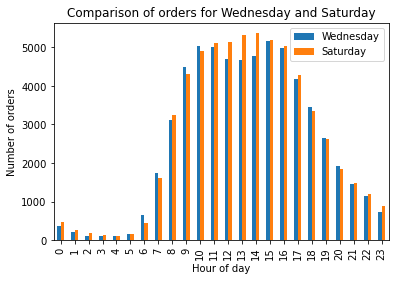

In [43]:
hod_counts.plot(kind='bar',
                title='Comparison of orders for Wednesday and Saturday',
                xlabel='Hour of day',
                ylabel='Number of orders'
               )
plt.show()

There's a small dip from 11h to 13h on Wednesdays. This dip is absent on Saturdays. Maybe this dip can be attributed to people who don't use Instacart because they have lunch somewhere between 11h and 13h.

### [B2] What's the distribution for the number of orders per customer?

In [44]:
order_count_per_user = orders.groupby('user_id')['order_id'].count().sort_values()
order_count_per_user

user_id
152331     1
139876     1
60408      1
139873     1
139871     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64

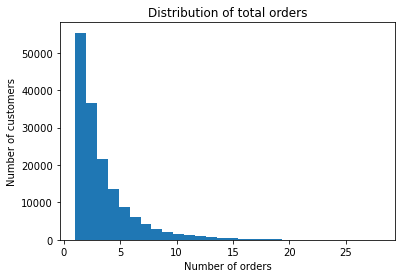

In [45]:
order_count_per_user.plot(kind='hist',
                          bins=28,
                          title='Distribution of total orders'
                         )
plt.xlabel('Number of orders')
plt.ylabel('Number of customers')
plt.show()

Most customers in the dataset have placed between 1 and 10 orders, with number of orders per customer sharply decreasing after just 1 order.

### [B3] What are the top 20 popular products (display their id and name)?

In [46]:
df_merge = order_products.merge(products, on='product_id')
df_merge

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23,0,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,Sweet Teriyaki Chicken Oven Sauce,5,13
4545003,2621676,25201,10,0,Crisp Waters Candle Scents,101,17
4545004,937623,49153,2,0,Shine Collection Brillance Shampoo,22,11
4545005,532895,8182,1,0,Total Mint Stripe Gel Toothpaste,20,11


In [47]:
top_products = df_merge.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
top_products.head(20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64

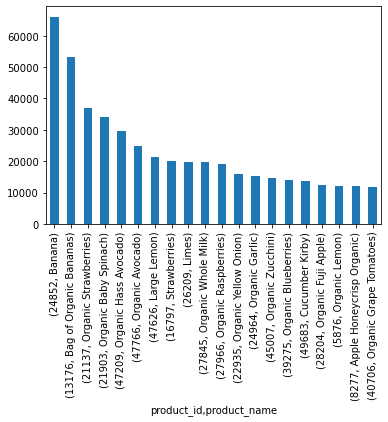

In [48]:
top_products.head(20).plot.bar()
plt.show()

The top 20 items are all produce, except for the milk. Looks like people want delicious and nutritious!

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [49]:
num_items = order_products.groupby('order_id').count()['product_id']
histogram_vals = num_items.value_counts().sort_index()
histogram_vals

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64

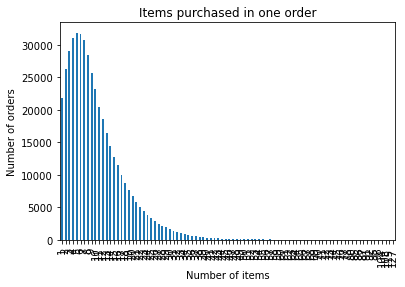

In [50]:
histogram_vals.plot(kind='bar',
                title='Items purchased in one order',
                xlabel='Number of items',
                ylabel='Number of orders'
               )
plt.show()

Most of the order numbers are in the tail of the distribution. To get a better look at the non-tail part, let's choose a value in the tail as a cutoff and just plot order with fewer than that many items. An order size of 35 items is far enough into the tail for this.

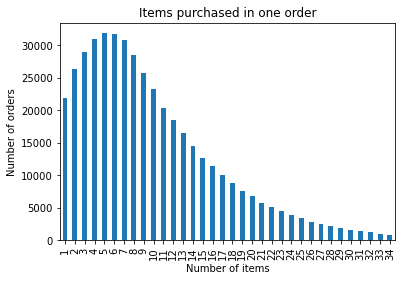

In [51]:
histogram_vals[histogram_vals.index < 35].plot(kind='bar',
                title='Items purchased in one order',
                xlabel='Number of items',
                ylabel='Number of orders'
               )
plt.show()

The typical order contains 5 or 6 items, with most orders having between 1 and 20 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [52]:
reorder_products = order_products[order_products['reordered'] == 1]
reorder_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
6,644579,12341,5,1
7,2231852,44925,10,1
8,3185766,36259,14,1
9,420019,23315,4,1
10,925051,9421,2,1


In [53]:
df_merge = reorder_products.merge(products, on='product_id')
df_merge

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1,1,Bag Of Ice,37,1
1,761899,1560,2,1,Bag Of Ice,37,1
2,1388514,1560,8,1,Bag Of Ice,37,1
3,2629631,1560,1,1,Bag Of Ice,37,1
4,866921,1560,6,1,Bag Of Ice,37,1
...,...,...,...,...,...,...,...
2683833,1338379,33506,3,1,Simply 9 White Meat Chicken & Whole Barley Rec...,40,8
2683834,191894,27878,3,1,Crackers Wheat Sundried Tomato Basil Crispy,78,19
2683835,3041739,31751,14,1,French Style Cut Green Beans,116,1
2683836,949244,24384,18,1,Invisible Matte Finish Tape,10,17


In [54]:
top_reordered_products = df_merge.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
top_reordered_products.head(20)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

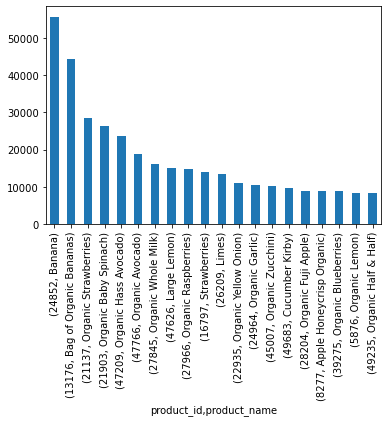

In [55]:
top_reordered_products.head(20).plot.bar()
plt.show()

It looks like produce and dairy comprise the most reordered products as well. It makes sense that perishables would be the most reordered items.

### [C3] For each product, what proportion of its orders are reorders?

In [56]:
order_products['reordered'].unique()

array([0, 1], dtype=int64)

In [57]:
df_merge = order_products.merge(products)
reorder_rate = df_merge.groupby(['product_id', 'product_name'])['reordered'].mean()
reorder_rate

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

In [58]:
reorder_rate_as_df = reorder_rate.sort_values(ascending=False).reset_index()
reorder_rate_as_df.sort_values(by='product_id')

,product_id,product_name,reordered
12126,1,Chocolate Sandwich Cookies,0.564286
43403,2,All-Seasons Salt,0.000000
3834,3,Robust Golden Unsweetened Oolong Tea,0.738095
14955,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,0.510204
18024,7,Pure Coconut Water With Orange,0.500000
...,...,...,...
2623,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
21509,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
22342,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
21155,49693,SPRING WATER BODY WASH,0.440000


### [C4] For each customer, what proportion of their products ordered are reorders?

In [59]:
df_merge = order_products.merge(orders)
reorder_pct = df_merge.groupby('user_id')['reordered'].mean()
reorder_pct

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

In [60]:
reorder_pct_as_df = reorder_pct.sort_values(ascending=False).reset_index()
reorder_pct_as_df

,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


### [C5] What are the top 20 items that people put in their carts first? 

In [61]:
df_merge = order_products.merge(products)
first_in_cart = df_merge[df_merge['add_to_cart_order'] == 1]
first_in_cart

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
6,1463503,11440,1,0,Chicken Breast Tenders Breaded,129,1
17,2201430,11440,1,1,Chicken Breast Tenders Breaded,129,1
21,1036054,11440,1,1,Chicken Breast Tenders Breaded,129,1
50,3008652,11440,1,1,Chicken Breast Tenders Breaded,129,1
62,2946144,11440,1,1,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4544972,1518168,16952,1,0,Sensitive Night Cream,73,11
4544977,1776450,21507,1,0,Gluten Free All-Purpose Rice Flour Blend,17,13
4544995,2333206,25467,1,0,Madagascar Pure Vanilla,17,13
4545005,532895,8182,1,0,Total Mint Stripe Gel Toothpaste,20,11


In [62]:
first_count = first_in_cart.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False)
first_count

product_id  product_name                                               
24852       Banana                                                         15562
13176       Bag of Organic Bananas                                         11026
27845       Organic Whole Milk                                              4363
21137       Organic Strawberries                                            3946
47209       Organic Hass Avocado                                            3390
                                                                           ...  
10981       Cloud White Decorating Cupcake Icing                               1
10985       Premium Twin Pack Rock Cornish Game Hen                            1
38272       Organic Raw Coconut Flour                                          1
10989       Garbage Disposal Freshener & Cleaner Red Pear with Magnolia        1
36996       Cool Sport Spray-On Sunscreen SPF 50                               1
Name: product_id, Length: 26760, dtyp

In [63]:
first_count_as_df = first_count.reset_index(name='count')
first_count_as_df.head(20)

,product_id,product_name,count
0,24852,Banana,15562
1,13176,Bag of Organic Bananas,11026
2,27845,Organic Whole Milk,4363
3,21137,Organic Strawberries,3946
4,47209,Organic Hass Avocado,3390
5,21903,Organic Baby Spinach,3336
6,47766,Organic Avocado,3044
7,19660,Spring Water,2336
8,16797,Strawberries,2308
9,27966,Organic Raspberries,2024


The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water. I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products. I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types. It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.